<a href="https://colab.research.google.com/github/pr31988/PyTorch-Fundamentals/blob/main/NN_classification_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **create data as a first step**

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

# create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
len(x), len(y)

(1000, 1000)

In [3]:
print(f'first 5 x: \n {x[:5]}')
print(f'first 5 y: \n {y[:5]}')

first 5 x: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 y: 
 [1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
import pandas as pd

circles= pd.DataFrame({'X1': x[:,0],
                       'X2': x[:, 1],
                       'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


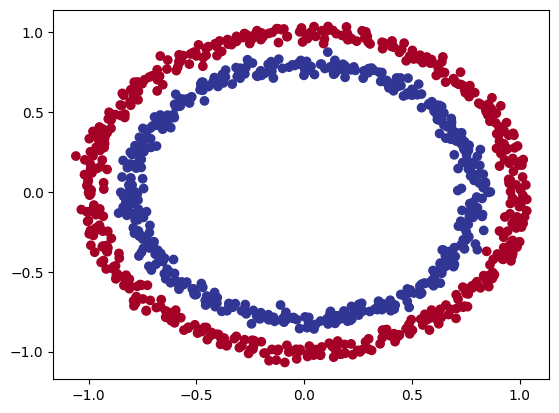

In [5]:
# visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=x[:, 0],
            y=x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


**Toy dataset**: The data we are referring to. the dataset small enough to experiment but sizeable enough to practice the fundamentals.

In [6]:
X_sample = x[0]
y_sample = y[0]

# x is vector, as it has 2 features, y is scalar as it has a single feature

X_sample, X_sample.shape, y_sample, y_sample.shape

(array([0.75424625, 0.23148074]), (2,), 1, ())

**1.2** convert data into tensor and create training & test split

In [7]:
x.dtype, y.dtype   # from numPy convert it to tensor

(dtype('float64'), dtype('int64'))

In [8]:
import torch

X = torch.from_numpy(x).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

X[:5], Y[:5], X.dtype, Y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

In [9]:
# split data into train & test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(700, 300, 700, 300)

# 1.3 Build a Model
 1. setup device agnostic code
 2. construct a model (subclass nn.Module)
 3. define a loss function & optimizer
 4. create a training and test loop

In [10]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

1. subclass nn.Module (almost all models in pyTorch subclass nn.Module)
2. create 2 nn.Linear() layers - capable of handeling shapes of our data
3. Define the forward()
4. instantiate the instance of the model and send it to target device

In [11]:
from sklearn import datasets
class circleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
  # create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales it to 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # define forward pass
    def forward(self, x):
      return self.layer_2(self.layer_1(x))  # x -> layer_1 -> layer_2 -> output

# create a instance of the model
model_0 = circleModelV0().to(device)
model_0

circleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [13]:
# lets replicate the above model using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3757, -0.5511],
                      [ 0.5768,  0.1514],
                      [-0.3020,  0.3252],
                      [-0.3198,  0.0156],
                      [ 0.4710,  0.6273]], device='cuda:0')),
             ('0.bias',
              tensor([-0.5460,  0.0997,  0.6391, -0.1577,  0.3061], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1209, -0.0904, -0.1371, -0.4461,  0.3340]], device='cuda:0')),
             ('1.bias', tensor([-0.2928], device='cuda:0'))])

In [15]:
# passing data through model
untrained_preds = model_0(X_test.to(device))
print(f'length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'length of sample: {len(Y_test)}, shape: {Y_test.shape}')
print(f'\nfirst 10 predictions:\n {untrained_preds[:10]}')
print(f'\nfirst 10 labels: \n {Y_test[:10]}')

length of predictions: 300, shape: torch.Size([300, 1])
length of sample: 300, shape: torch.Size([300])

first 10 predictions:
 tensor([[-0.3212],
        [-0.2045],
        [-0.4786],
        [-0.2773],
        [-0.2425],
        [-0.1730],
        [-0.0314],
        [-0.0234],
        [-0.4883],
        [-0.1940]], device='cuda:0', grad_fn=<SliceBackward0>)

first 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


**setup loss function & optimizer for classification model**

 we need to use Binary cross entropy or catagorical cross entropy --- loss function.

 **reminder** -  loss function calculates how wrong model predictions are

 most common optimizers -- SGD & adam.
 check `torch.optim` further

In [16]:
# create loss function
loss_fn = nn.BCEWithLogitsLoss()  # built in sigmoid activation

# create an optimizer
optim = torch.optim.SGD(params=model_0.parameters(),
                        lr=0.1)

**evalution Matrics **- to measure how model is going --> calculate **accuracy**

In [17]:
# calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()  # calculate whether two tensors are equal
  acc = (correct/len(y_pred)) * 100
  return acc

# **Train the Model: **

to train the model --> need a training loop:
1. forward pass
2. calculate the loss
3. Optimizer zero grad
4. loss backward (back propagation)
5. Optimizer step (gradient descent)

# going from raw logits --> prediction probabilities --> prediction labels

our model outputs are going to be raw **logits**

we can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.q. sigmoid for binary classification , softmax for muticlass classification)

then we can convert our model's prediction probabilites to prediction labels by other rounding them or taking the argmax()

In [18]:
# first 5 outputs of farward pass --> logits
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.3212],
        [-0.2045],
        [-0.4786],
        [-0.2773],
        [-0.2425]], device='cuda:0')

In [19]:
# use the sigmoid activation function to turn logits into prediction probabilties

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4204],
        [0.4491],
        [0.3826],
        [0.4311],
        [0.4397]], device='cuda:0')

In [20]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [21]:
# find the predict labels
y_preds = torch.round(y_pred_probs)

# in full (logits --> pred probs --> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [22]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

# Build Training & Testing Loop

In [23]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# put the data to target device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)

# building the training loop
for epoch in range (epochs):
# Training
  model_0.train()

  #1. Forward pass:
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits --> pred probs --> pred labels

  #2. calculate the loss/accuracy

  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 Y_train)
  acc = accuracy_fn(y_true=Y_train,
                    y_pred=y_pred)

  #3. Optimizer zero grad
  optim.zero_grad()

  #4. Loss backward (backpropagation)
  loss.backward()

  #5. optimizer step (gradient descent)
  optim.step()

##Testing loop
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        Y_test)
    test_acc = accuracy_fn(y_true=Y_test,
                           y_pred=test_pred)

    # 3. print whats happening
  if epoch % 10 == 0:
    print(f'epoch= {epoch} | train_loss= {loss:.5f} | train_acc= {acc:.2f} % | test loss= {test_loss: .2f} | test acc= {test_acc:.2f} %')


epoch= 0 | train_loss= 0.70776 | train_acc= 49.14% | test loss=  0.70 | test acc= 52.00%
epoch= 10 | train_loss= 0.69960 | train_acc= 46.43% | test loss=  0.70 | test acc= 48.00%
epoch= 20 | train_loss= 0.69654 | train_acc= 49.00% | test loss=  0.70 | test acc= 48.67%
epoch= 30 | train_loss= 0.69520 | train_acc= 50.00% | test loss=  0.70 | test acc= 48.33%
epoch= 40 | train_loss= 0.69449 | train_acc= 50.29% | test loss=  0.70 | test acc= 49.00%
epoch= 50 | train_loss= 0.69404 | train_acc= 50.43% | test loss=  0.70 | test acc= 49.00%
epoch= 60 | train_loss= 0.69373 | train_acc= 50.57% | test loss=  0.70 | test acc= 47.67%
epoch= 70 | train_loss= 0.69351 | train_acc= 51.29% | test loss=  0.70 | test acc= 47.33%
epoch= 80 | train_loss= 0.69334 | train_acc= 51.57% | test loss=  0.70 | test acc= 48.00%
epoch= 90 | train_loss= 0.69321 | train_acc= 51.43% | test loss=  0.70 | test acc= 47.67%


In [26]:
import requests
from pathlib import Path

# Download Helper functions from Learn PyTorch repo (if its not already downloaded)
if Path("helper_functions.py").is_file():
  print('helper_functions.py already exists, dont download')
else:
  print('downloading helper_function.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, dont download


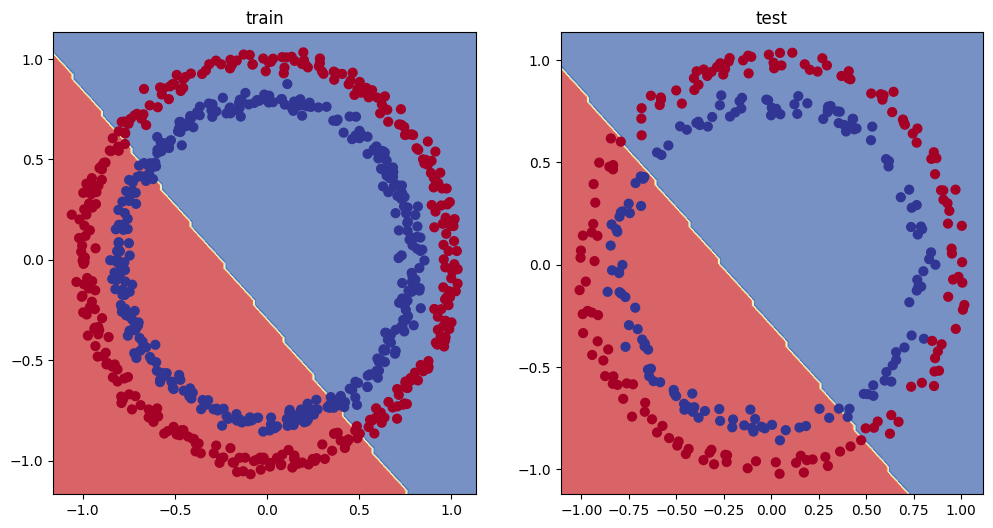

In [27]:
# plot decision boundry of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_0,X_train, Y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0, X_test, Y_test)